<a href="https://colab.research.google.com/github/myra573/MeeraS/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scenario: You have 3 robots at coordinates given below. A charging station is at (0,0). Find which robot is closest to the charger using Euclidean distance.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
robots = pd.DataFrame({
    'Robot': ['R1', 'R2', 'R3'],
    'X': [5, 2, 8],
    'Y': [5, 9, 1]
})
robot_coords = robots[['X', 'Y']].values #Combining the two 5 5 into -> (5,5)
charger = np.array([[0, 0]])

In [ ]:
from scipy.spatial.distance import cdist

In [ ]:
distances = cdist(robot_coords, charger, metric='euclidean')

In [ ]:
distances

array([[7.07106781],
       [9.21954446],
       [8.06225775]])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = {
    'Income': [15, 16, 17, 18, 19, 20, 60, 62, 65, 63, 70],
    'Score':  [39, 81, 40, 75, 38, 79, 10, 15, 12, 11, 14]
}
df = pd.DataFrame(data)
df

,Income,Score
0,15,39
1,16,81
2,17,40
3,18,75
4,19,38
5,20,79
6,60,10
7,62,15
8,65,12
9,63,11


In [ ]:
# Unsupervised, there is no y!
X = df[['Income', 'Score']].values # Combine both into one place
# y = ??

In [ ]:
model = KMeans(n_clusters=3)

In [ ]:
final_group_number = model.fit_predict(X)

In [ ]:
final_group_number

array([1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df['Group_Number'] = final_group_number
df

,Income,Score,Group_Number
0,15,39,1
1,16,81,2
2,17,40,1
3,18,75,2
4,19,38,1
5,20,79,2
6,60,10,0
7,62,15,0
8,65,12,0
9,63,11,0


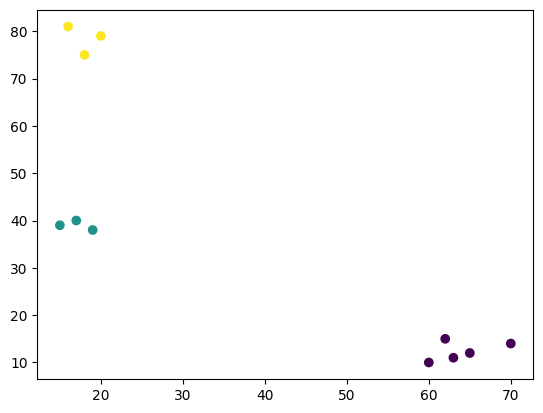

In [ ]:
plt.scatter(df['Income'], df['Score'], c=df['Group_Number'])

In [ ]:
df = pd.DataFrame({
    'Math': [90, 92, 10, 12, 50, 55, 88, 15],
    'Science': [85, 88, 12, 15, 52, 55, 90, 10]
})
df

,Math,Science
0,90,85
1,92,88
2,10,12
3,12,15
4,50,52
5,55,55
6,88,90
7,15,10


In [ ]:
# We need to try different values of K, and check sum of distance each time
data = {
    'Income': [15, 16, 17, 18, 19, 20, 60, 62, 65, 63, 70],
    'Score':  [39, 81, 40, 75, 38, 79, 10, 15, 12, 11, 14]
}
df = pd.DataFrame(data)
df

,Income,Score
0,15,39
1,16,81
2,17,40
3,18,75
4,19,38
5,20,79
6,60,10
7,62,15
8,65,12
9,63,11


In [ ]:
X = df[['Income', 'Score']].values

In [ ]:
# WCSS -> Within cluster sum of Squares
sum_of_distances = []

for i in range(1,11): # K = 1, K= 2, K= 3.... K = 10
    model = KMeans(n_clusters = i)
    model.fit(X)

    sum_of_distances.append(model.inertia_)

sum_of_distances

[14169.09090909091,
 2434.0333333333338,
 111.86666666666667,
 63.666666666666664,
 68.0,
 39.5,
 24.66666666666667,
 12.5,
 5.0,
 2.5]

Text(0, 0.5, 'Sum of Distances')

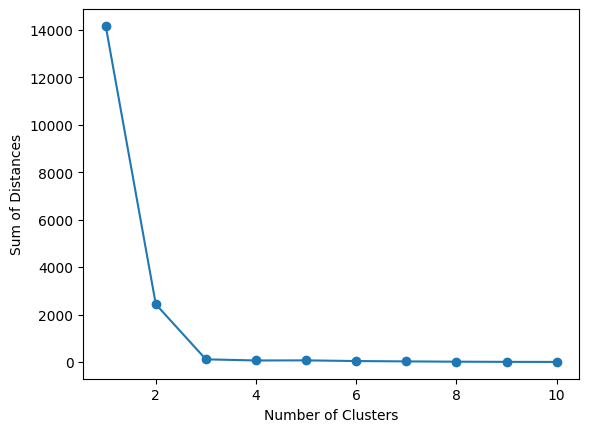

In [ ]:
plt.plot(range(1,11), sum_of_distances, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Distances")

In [ ]:
df = pd.read_csv('cricket-players.csv')
df

,Player Name,Runs,Wickets
0,Virat Kohli,25583,4
1,Rohit Sharma,18325,8
2,Kane Williamson,17306,9
3,Joe Root,19671,5
4,Steve Smith,18193,17
5,David Warner,17543,4
6,Babar Azam,13776,2
7,Quinton de Kock,12964,0
8,Jonny Bairstow,11358,0
9,KL Rahul,10263,0
